In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

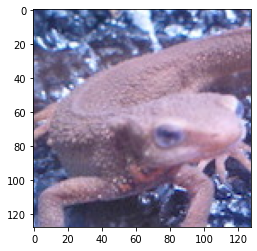

In [31]:
#q1
rgb = plt.imread('imori.jpg')
plt.imshow(rgb)

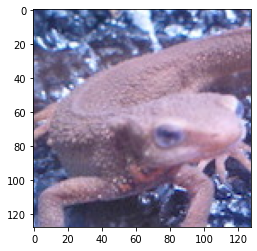

In [30]:
bgr = cv2.imread('imori.jpg')
rgb = bgr.copy()
rgb[:, :, 0] = bgr[:, :, -1]
rgb[:, :, -1] = bgr[:, :, 0]
plt.imshow(rgb)

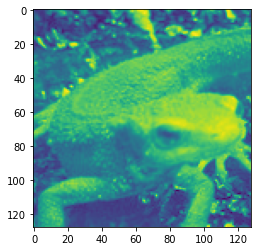

In [32]:
red = rgb[:, :, 0]
plt.imshow(red)

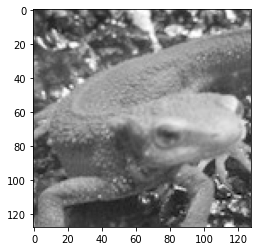

In [54]:
#q2
img = plt.imread('imori.jpg')
gray = 0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]
gray = gray.astype(np.uint8)
plt.imshow(gray.astype(np.uint8), cmap='gray')

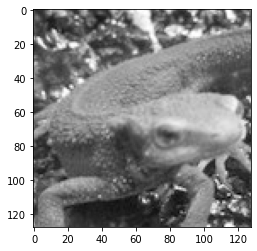

In [41]:
cv2_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2_gray, cmap='gray')

In [70]:
# q3
img = plt.imread('imori.jpg')
gray = (0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]).astype(np.uint8)
binary = np.zeros_like(gray)
binary[gray < 128] = 0
binary[gray >= 128] = 255

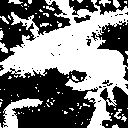

In [75]:
Image.fromarray(binary)

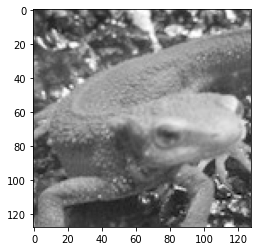

In [93]:
#q4 Otsu's method
img = plt.imread('imori.jpg')
gray = (0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]).astype(np.uint8)
plt.imshow(gray, cmap='gray')

In [107]:
def calculate_Sb(th):
    lower, higher = gray[gray > th], gray[gray <= th]
    total_pixel = gray.reshape((-1)).shape[0]
    w0 = lower.shape[0] / total_pixel
    w1 = higher.shape[0] / total_pixel
    M0, M1 = lower.mean(), higher.mean()
    Sb = w0 * w1 * (M0 - M1) ** 2
    Sb =Sb**2
    return Sb


In [108]:
max_val, best_th = 0, 0
for i in range(0, 255, 1):
    val = calculate_Sb(i)
    if val > max_val:
        max_val = val
        best_th = i
best_th, max_val

/tmp/ipykernel_23794/935674033.py:6: RuntimeWarning: Degrees of freedom <= 0 for slice
  S0, S1 = lower.var(), higher.var()
/home/haochen/Projects/ImageProcessing100Wen/venv/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/haochen/Projects/ImageProcessing100Wen/venv/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_23794/935674033.py:7: RuntimeWarning: Mean of empty slice.
  M0, M1 = lower.mean(), higher.mean()
/home/haochen/Projects/ImageProcessing100Wen/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(126, 2666972.2511454797)

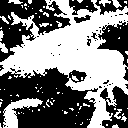

In [106]:
img = plt.imread('imori.jpg')
gray = (0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]).astype(np.uint8)
binary = np.zeros_like(gray)
binary[gray < 126] = 0
binary[gray >= 126] = 255
Image.fromarray(binary)